# Exercice solution

The main question we’d like you to answer is whether or not there is any correlation between app activity and physical activity and what this looks like over time (initial impact, drop off etc.). We often see seasonality in our data so it’s important for you to know these users are based in Australia. Any other insights you can give us would be a bonus – such as segmenting users based on app engagement profile, whether we would be able to anticipate drop off etc.

In [30]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [70]:
#upload and show df with members information
member_df = pd.read_excel('C:/Users/Usuario/Desktop/LW_docs/Member_nopass.xlsx')
member_df.head()

,UserID,UserCompanyLinkID,Age Group,BMI Group,Gender
0,002c5434-2390-440d-886f-f03b09c79651,3907,NaN,Overweight,Male
1,0051aee8-67ad-4186-9934-10d61b967bf2,4143,40 - 49,Normal weight,Female
2,005ab8a5-ab67-421b-9a39-3998dc9232ce,3716,NaN,Normal weight,Male
3,005dfde1-9412-4cc8-baad-9db8c3c568da,6289,40 - 49,Normal weight,Female
4,009220b1-543e-4362-9ccf-479184c01063,4860,40 - 49,Overweight,Male


In [71]:
#upload and show df with app engagement information
AppEngagement_df = pd.read_excel('C:/Users/Usuario/Desktop/LW_docs/AppEngagement_nopass.xlsx')

#we convert UserCompanyLinkID from float to integer in order to have the same value type with member_df 
AppEngagement_df['UserCompanyLinkID'] = AppEngagement_df['UserCompanyLinkID'].fillna(0).astype(int)

AppEngagement_df.head()

,UserCompanyLinkID,AddDateTimeUTC
0,6435,2021-03-25T13:53:08.7370000
1,4439,2021-03-25T13:46:18.6300000
2,4266,2021-03-25T13:22:33.3130000
3,4266,2021-03-25T13:22:32.9670000
4,3705,2021-03-25T13:19:18.4730000


In [72]:
#upload and show df with physical activity information
Physical_activity_df = pd.read_excel('C:/Users/Usuario/Desktop/LW_docs/Physical_activity_nopass.xlsx')
Physical_activity_df.head()

,UserID,ActivityDate,Activity_Score,Calories,Distance,Steps
0,002c5434-2390-440d-886f-f03b09c79651,2019/12/25 12:00:00 AM,91,586,6153,6622
1,002c5434-2390-440d-886f-f03b09c79651,2019/12/26 12:00:00 AM,0,0,0,0
2,002c5434-2390-440d-886f-f03b09c79651,2019/12/27 12:00:00 AM,0,0,0,0
3,002c5434-2390-440d-886f-f03b09c79651,2019/12/28 12:00:00 AM,0,0,0,0
4,002c5434-2390-440d-886f-f03b09c79651,2019/12/29 12:00:00 AM,0,0,0,0


# Next Steps

After upload all the information and verify it, we need to do the following operations in order to solve our excercise.

First, we will create a new df with only the numeric columns from Physical_activity_df. What we want to see if there is a relationship between the different variables and how they are shown in a matrix. The values of this matrix will be the **correlation coefficient**.

Second, we will plot this results.

In [73]:
#we create a new df with numerical variables for our lineal regression model
regression_df = Physical_activity_df[['Activity_Score','Calories','Distance','Steps']]

regression_df.head()

,Activity_Score,Calories,Distance,Steps
0,91,586,6153,6622
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [28]:
#correlation table
regression_df.corr()

,Activity_Score,Calories,Distance,Steps
Activity_Score,1.000000,0.990461,0.767062,0.837804
Calories,0.990461,1.000000,0.761677,0.838237
Distance,0.767062,0.761677,1.000000,0.737425
Steps,0.837804,0.838237,0.737425,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

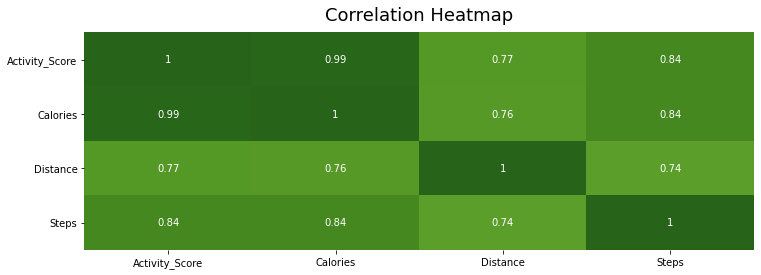

In [74]:
#table visualization
plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(regression_df.corr(), vmin=-1, vmax=1, annot=True, cbar=False, cmap='PiYG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

### Conclusions

In this table, we can observe the following: there is a **strong positive correlation** between the Activity_Score and the consumntion of calories, distance done or steps done. Being calories the one that have an almost perfect correlation.

# Prediction Part

After get our conclusions, we will create our model in order to be able to predict some future results with it.

In [38]:
prediction_df = Physical_activity_df[['Activity_Score','Calories']]

In [50]:
#change to df variables
activity_score = pd.DataFrame(prediction_df['Activity_Score'])
calories = pd.DataFrame(prediction_df['Calories'])

In [52]:
#model definition
lm = linear_model.LinearRegression()
model = lm.fit(activity_score,calories)

In [53]:
model.coef_

array([[6.45191227]])

In [54]:
model.intercept_

array([6.86708747])

In [55]:
# coefficient of correlation
model.score(activity_score,calories)

0.981013226652238

In [67]:
#predict new values for calories
activity_score_new =99
calories_predict = model.predict([[99]])
calories_predict

array([[645.60640226]])

In [65]:
#predict more values as a test for our model

x = ([98,44,120])
x = pd.DataFrame(x)

y = model.predict(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1 , keys= ['activity_score','calories'])

df

,activity_score,calories
,0,0
0,98,639.154490
1,44,290.751227
2,120,781.096560


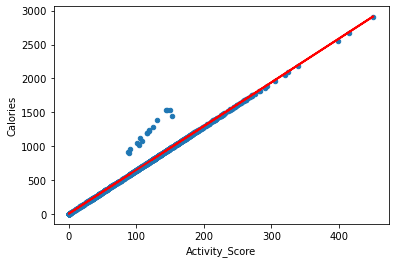

In [69]:
#visualization plot
prediction_df.plot(kind='scatter', x= 'Activity_Score', y= 'Calories')
#plotting the regression line
plt.plot(activity_score,model.predict(activity_score), color='red', linewidth=2)
plt.show()

### Conclusions

As we can see in the table above, our model generates new values from the independent variable. For example, in this case, our model is telling us that with an Activity_Score of 98 you should consume 639.15 calories. 

If we take a look into the visualitzation plot, we can observe, the previously mentioned, "almost perfect" correlation between the variables.